In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

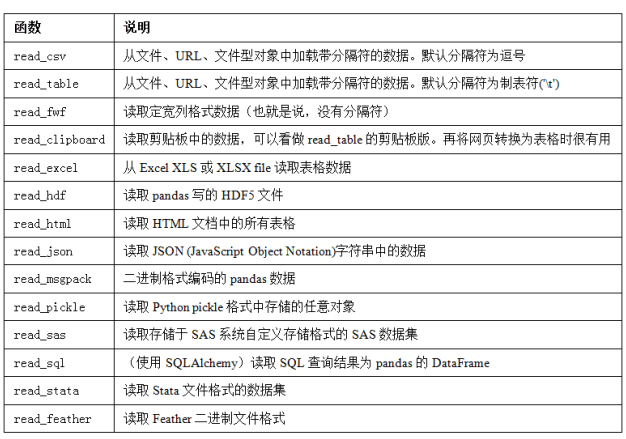

- 其中一些函数，比如pandas.read_csv，有类型推断功能，因为列数据的类型不属于数据类
型。也就是说，你不需要指定列的类型到底是数值、整数、布尔值，还是字符串。
- 其它的数据格式，如HDF5、Feather和msgpack，会在格式中存储数据类型。
日期和其他自定义类型的处理需要多花点工夫才行。
首先我们来看一个以逗号分隔的
（CSV）文本文件：

In [3]:
df = pd.read_csv('examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


- 我们还可以使用read_table，并指定分隔符

In [4]:
pd.read_table('examples/ex1.csv',sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


- 并不是所有文件都有标题行,读入该文件的办法有两个。你可以让pandas为其分配默认的列名，也可以自己定义列名

In [6]:
pd.read_csv('examples/ex2.csv')

,1,2,3,4,hello
0,5,6,7,8,world
1,9,10,11,12,foo


In [7]:
pd.read_csv('examples/ex2.csv',header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [8]:
pd.read_csv('examples/ex2.csv', names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [10]:
pd.read_csv('examples/ex2.csv', columns=['a', 'b', 'c', 'd', 'message'])

TypeError: parser_f() got an unexpected keyword argument 'columns'

- 假设你希望将message列做成DataFrame的索引。你可以明确表示要将该列放到索引4的位
置上，也可以通过index_col参数指定"message"：

In [11]:
names=['a', 'b', 'c', 'd', 'message']
pd.read_csv('examples/ex2.csv', names=names,index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


- 如果希望将多个列做成一个层次化索引，只需传入由列编号或列名组成的列表即可

In [12]:
parsed = pd.read_csv('examples/csv_mindex.csv',
                     index_col=['key1', 'key2'])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [13]:
list(open('examples/ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

- !! 有些情况下，有些表格可能不是用固定的分隔符去分隔字段的（比如空白符或其它模式）虽然可以手动对数据进行规整，这里的字段是被数量不同的空白字符间隔开的。这种情况
下，你可以传递一个正则表达式作为read_table的分隔符。可以用正则表达式表达为\s+

In [15]:
result = pd.read_table('examples/ex3.txt',sep='\s+')
result
# 这里，由于列名比数据行的数量少，所以read_table推断第一列应该是DataFrame的索引

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


- 缺失值处理是文件解析任务中的一个重要组成部分。缺失数据经常是要么没有（空字符
串），要么用某个标记值表示。默认情况下，pandas会用一组经常出现的标记值进行识
别，比如NA及NULL

In [18]:
result = pd.read_csv('examples/ex5.csv')
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [19]:
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


- na_values可以用一个列表或集合的字符串表示缺失值

In [22]:
# na_values里的值都为NULL，输出为NaN
result = pd.read_csv('examples/ex5.csv', na_values=["NULL"])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


- 使用字典的方式，让各列可以使用不同的NA标记值

In [23]:
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}
pd.read_csv('examples/ex5.csv', na_values=sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


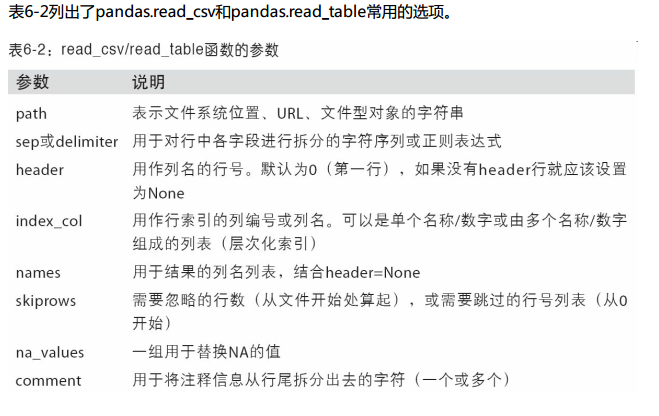

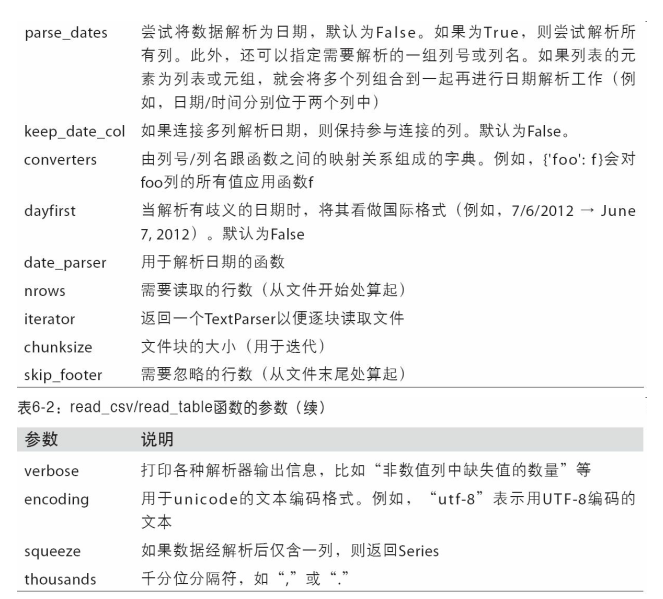

## 逐块读取文本文件

#### 设置pandas显示地更紧些

In [24]:
pd.options.display.max_rows = 10

In [25]:
result = pd.read_csv('examples/ex6.csv')
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


- 如果只想读取几行（避免读取整个文件），通过nrows进行指定即可：

In [26]:
pd.read_csv('examples/ex6.csv',nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


- 要逐块读取文件，可以指定chunksize（行数）:
    

In [27]:
chunker = pd.read_csv('examples/ex6.csv',chunksize=1000)
chunker

#### !!!!read_csv所返回的这个TextParser对象使你可以根据chunksize对文件进行逐块迭代。比如说，我们可以迭代处理ex6.csv，将值计数聚合到"key"列中，如下所示

In [28]:
chunker = pd.read_csv('examples/ex6.csv',chunksize=1000)
tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)
    
tot = tot.sort_values(ascending=False)

In [29]:
tot

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
     ...  
5    157.0
2    152.0
0    151.0
9    150.0
1    146.0
Length: 36, dtype: float64

- TextParser还有一个get_chunk方法，它使你可以读取任意大小的块。
## 将数据写出到文本格式

In [30]:
data = pd.read_csv('examples/ex5.csv')
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [31]:
data.to_csv('examples/out.csv')

- 当然，还可以使用其他分隔符（由于这里直接写出到sys.stdout，所以仅仅是打印出文本结
果而已）：

In [32]:
import sys

data.to_csv(sys.stdout,sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


- 缺失值在输出结果中会被表示为空字符串。你可能希望将其表示为别的标记值：

In [33]:
data.to_csv(sys.stdout,na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


- 如果没有设置其他选项，则会写出行和列的标签。当然，它们也都可以被禁用：

In [34]:
data.to_csv(sys.stdout,index=False,header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


- 此外，你还可以只写出一部分的列，并以你指定的顺序排列：

In [39]:
data.to_csv(sys.stdout, index=False, columns=['a', 'b', 'c'])

a,b,c
1,2,3.0
5,6,
9,10,11.0


In [38]:
data.to_csv(sys.stdout, index=False, header=['a', 'b', 'c',1,2,3])

a,b,c,1,2,3
one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


- Series也有一个to_csv方法

In [40]:
dates = pd.date_range('1/1/2000', periods=7)
ts = pd.Series(np.arange(7), index=dates)
ts.to_csv('examples/tseries.csv')

## 处理分隔符格式

- 对于任何单字符分隔符文件，可以直接使用Python内置的csv模块。将任意已打开的文件或
文件型的对象传给csv.reader

In [41]:
import csv

f = open('examples/ex7.csv')
reader = csv.reader(f)

In [42]:
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [43]:
with open('examples/ex7.csv') as f:
    lines = list(csv.reader(f))

In [44]:
header, values = lines[0], lines[1:]

In [45]:
data_dict = {h: v for h, v in zip(header, zip(*values))}
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

- CSV文件的形式有很多。只需定义csv.Dialect的一个子类即可定义出新格式（如专门的分隔
符、字符串引用约定、行结束符等）：

In [46]:
class my_dialect(csv.Dialect):
    lineterminator = '\n'
    delimiter = ';'
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL

In [49]:
f = open('examples/ex7.csv')
reader = csv.reader(f, dialect=my_dialect)
f.close()

- 各个CSV语支的参数也可以用关键字的形式提供给csv.reader，而无需定义子类：

In [51]:
f = open('examples/ex7.csv')
reader = csv.reader(f, delimiter='|')
f.close()
reader

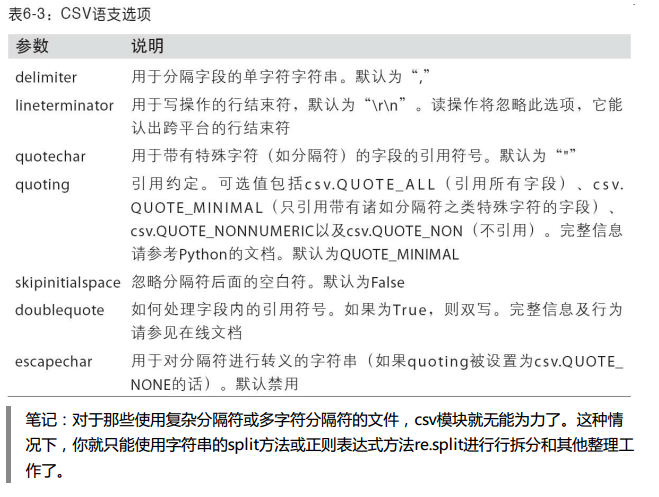

### JSON数据

In [52]:
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

除其空值null和一些其他的细微差别（如列表末尾不允许存在多余的逗号）之外，JSON非常
接近于有效的Python代码。基本类型有对象（字典）、数组（列表）、字符串、数值、布尔
值以及null。对象中所有的键都必须是字符串。许多Python库都可以读写JSON数据。我将
使用json，因为它是构建于Python标准库中的。通过json.loads即可将JSON字符串转换成
Python形式

In [53]:
import json
result = json.loads(obj)
result

{'name': 'Wes',
 'pet': None,
 'places_lived': ['United States', 'Spain', 'Germany'],
 'siblings': [{'age': 30, 'name': 'Scott', 'pets': ['Zeus', 'Zuko']},
  {'age': 38, 'name': 'Katie', 'pets': ['Sixes', 'Stache', 'Cisco']}]}

－　ｄｕｍｐｓ将Ｐｙｔｈｏｎ对象转换成ＪＳＯＮ格式

In [55]:
ajson = json.dumps(result)
ajson

'{"places_lived": ["United States", "Spain", "Germany"], "pet": null, "name": "Wes", "siblings": [{"age": 30, "name": "Scott", "pets": ["Zeus", "Zuko"]}, {"age": 38, "name": "Katie", "pets": ["Sixes", "Stache", "Cisco"]}]}'

- 将（一个或一组）JSON对象转换为DataFrame或其他便于分析的数据结构,最简单方便的方式是：向DataFrame构造器传入一个字典的列表（就是原先的JSON对
象），并选取数据字段的子集

In [56]:
siblings = pd.DataFrame(result['siblings'], columns=['name', 'age'])
siblings

,name,age
0,Scott,30
1,Katie,38


In [57]:
siblings = pd.DataFrame(result['siblings'], columns=['name', 'age','pets'])
siblings

,name,age,pets
0,Scott,30,"[Zeus, Zuko]"
1,Katie,38,"[Sixes, Stache, Cisco]"


- pandas.read_json可以自动将特别格式的JSON数据集转换为Series或DataFrame。例如：

In [58]:
# 比如网页返回的就是个表格样式，其json数据应该可以直接读。
data = pd.read_json('examples/example.json')
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


### XML和HTML：Web信息收集

- lxml的速度比较快，但其它的库处理有误的HTML或XML文件更好。
- pandas有一个内置的功能，read_html，它可以使用lxml和Beautiful Soup自动将HTML文
件中的表格解析为DataFrame对象。
- 为了进行展示，我从美国联邦存款保险公司下载了一个
HTML文件（pandas文档中也使用过），它记录了银行倒闭的情况。首先，你需要安装
read_html用到的库：

In [59]:
tables = pd.read_html('examples/fdic_failed_bank_list.html')
len(tables)

1

In [61]:
failures = tables[0]
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [62]:
close_timestamps = pd.to_datetime(failures['Closing Date'])
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
       ... 
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing Date, Length: 15, dtype: int64

#### 利用lxml.objectify解析XML

XML（Extensible Markup Language）是另一种常见的支持分层、嵌套数据以及元数据的
结构化数据格式。本书所使用的这些文件实际上来自于一个很大的XML文档。
前面，我介绍了pandas.read_html函数，它可以使用lxml或Beautiful Soup从HTML解析
数据。XML和HTML的结构很相似，但XML更为通用

In [64]:
from lxml import objectify

path = 'datasets/mta_perf/Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()
root

<Element PERFORMANCE at 0x19a86288>

root.INDICATOR返回一个用于产生各个XML元素的生成器。对于每条记录，我们可以用标
记名（如YTD_ACTUAL）和数据值填充一个字典（排除几个标记）

In [65]:
data = []

skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ',
               'DESIRED_CHANGE', 'DECIMAL_PLACES']

for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

In [66]:
data

[{'AGENCY_NAME': 'Metro-North Railroad',
  'CATEGORY': 'Service Indicators',
  'DESCRIPTION': 'Percent of commuter trains that arrive at their destinations within 5 minutes and 59 seconds of the scheduled time. West of Hudson services include the Pascack Valley and Port Jervis lines. Metro-North Railroad contracts with New Jersey Transit to operate service on these lines.\n',
  'FREQUENCY': 'M',
  'INDICATOR_NAME': 'On-Time Performance (West of Hudson)',
  'INDICATOR_UNIT': '%',
  'MONTHLY_ACTUAL': 96.9,
  'MONTHLY_TARGET': 95.0,
  'PERIOD_MONTH': 1,
  'PERIOD_YEAR': 2008,
  'YTD_ACTUAL': 96.9,
  'YTD_TARGET': 95.0},
 {'AGENCY_NAME': 'Metro-North Railroad',
  'CATEGORY': 'Service Indicators',
  'DESCRIPTION': 'Percent of commuter trains that arrive at their destinations within 5 minutes and 59 seconds of the scheduled time. West of Hudson services include the Pascack Valley and Port Jervis lines. Metro-North Railroad contracts with New Jersey Transit to operate service on these lines.\

In [67]:
perf = pd.DataFrame(data)
perf.head()

,AGENCY_NAME,CATEGORY,DESCRIPTION,FREQUENCY,INDICATOR_NAME,INDICATOR_UNIT,MONTHLY_ACTUAL,MONTHLY_TARGET,PERIOD_MONTH,PERIOD_YEAR,YTD_ACTUAL,YTD_TARGET
0,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.9,95,1,2008,96.9,95
1,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,95,95,2,2008,96,95
2,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.9,95,3,2008,96.3,95
3,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,98.3,95,4,2008,96.8,95
4,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,95.8,95,5,2008,96.6,95


In [68]:
from io import StringIO
tag = '<a href="http://www.google.com">Google</a>'
root = objectify.parse(StringIO(tag)).getroot()

In [69]:
root

<Element a at 0x19a862c8>

In [70]:
root.get('href')

'http://www.google.com'

In [71]:
root.text

'Google'

#### 二进制数据格式

- 实现数据的高效二进制格式存储最简单的办法之一是使用Python内置的pickle序列化。
pandas对象都有一个用于将数据以pickle格式保存到磁盘上的to_pickle方法

In [72]:
frame = pd.read_csv('examples/ex1.csv')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [73]:
frame.to_pickle('examples/frame_pickle')

In [74]:
pd.read_pickle('examples/frame_pickle')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


注意：pickle仅建议用于短期存储格式。其原因是很难保证该格式永远是稳定的；今天
pickle的对象可能无法被后续版本的库unpickle出来。

### 使用HDF5格式  240页-工作中暂用不到

# 读取Microsoft Excel文件
- pandas的ExcelFile类或pandas.read_excel函数支持读取存储在Excel 2003（或更高版本）
中的表格型数据。这两个工具分别使用扩展包xlrd和openpyxl读取XLS和XLSX文件。

In [77]:
xlsx = pd.ExcelFile('examples/ex1.xlsx')
xlsx

- 存储在表单中的数据可以read_excel读取到DataFrame

In [79]:
pd.read_excel(xlsx,'Sheet1')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


- 如果要读取一个文件中的多个表单，创建ExcelFile会更快，但你也可以将文件名传递到
pandas.read_excel：

In [81]:
frame = pd.read_excel('examples/ex1.xlsx', 'Sheet1')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


# Web APIs交互

In [82]:
import requests
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
resp

<Response [200]>

In [83]:
data = resp.json()
data[0]['title']

'Bug groupby idxmin'

In [84]:
issues = pd.DataFrame(data, columns=['number', 'title',
                                     'labels', 'state'])
issues

,number,title,labels,state
0,25531,Bug groupby idxmin,[],open
1,25529,fix segfault when running with cython coverage...,[],open
2,25528,DOC: Polishing typos out of doc/source/user_gu...,[],open
3,25527,Data dependent bug in mode aggregation,"[{'id': 307649777, 'node_id': 'MDU6TGFiZWwzMDc...",open
4,25526,DOC: Fixed PeriodArray api ref,"[{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...",open
...,...,...,...,...
25,25495,Unexpected dtype when using .loc to set Catego...,[],open
26,25488,Fix JSON orient='table' issues with numeric co...,"[{'id': 49379259, 'node_id': 'MDU6TGFiZWw0OTM3...",open
27,25484,BUG: User-facing AssertionError with add colum...,"[{'id': 42670965, 'node_id': 'MDU6TGFiZWw0MjY3...",open
28,25481,BUG: confusing error message for DataFrame.plot(),"[{'id': 42670965, 'node_id': 'MDU6TGFiZWw0MjY3...",open


# 6.4 数据库交互

In [85]:
import sqlite3
query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20),
 c REAL,        d INTEGER
);"""


In [86]:
con = sqlite3.connect('mydata.sqlite')

In [87]:
con.execute(query)

In [89]:
con.commit()

插入数据

In [90]:
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

In [91]:
cursor = con.execute('select * from test')
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

- 你可以将这个元组列表传给DataFrame构造器，但还需要列名（位于光标的description属
性中）

In [92]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

In [93]:
pd.DataFrame(rows,columns=[x[0] for x in cursor.description])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


- 这种数据规整操作相当多，你肯定不想每查一次数据库就重写一次。
- SQLAlchemy项目是一
个流行的Python SQL工具，它抽象出了SQL数据库中的许多常见差异。
- pandas有一个
read_sql函数，可以让你轻松的从SQLAlchemy连接读取数据。
- 这里，我们用SQLAlchemy
连接SQLite数据库，并从之前创建的表读取数据：

In [94]:
import sqlalchemy as sqla
db = sqla.create_engine('sqlite:///mydata.sqlite')
pd.read_sql('select * from test', db)

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5
